In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

import sklearn
# Линейная регрессия
from sklearn.linear_model import LinearRegression
# Логистическая регрессия
from sklearn.linear_model import LogisticRegression
# Случайный лес
from sklearn.ensemble import RandomForestClassifier
# Градиентный бустинг
from sklearn.ensemble import GradientBoostingClassifier

# разделение выборки на обучающую (train) и тестовую (test)
from sklearn.model_selection import train_test_split

# измерение качества работы модели
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, train_test_split

# датасеты
from sklearn.datasets import make_regression
from sklearn.datasets import make_regression
from sklearn.datasets import make_regression


import warnings
warnings.filterwarnings('ignore')

# Машинное обучение
<p>Курс "Модели и методы интеллектуального анализа данных"</p>
<p>Чернышов Юрий</p>
<p>к.ф.-м.н., доцент кафедры ИТЗИ УрГУПС (Екатеринбург)</p>
<p>yuchernyshov@usurt.ru</p>

# Оглавление <a name='toc'>

<ol>
<li><a href='#intro'>Введение</a></li>
<li><a href='#terms'>Термины и определения</a></li>
<li><a href='#MLtasks'>Примеры задач машинного обучения</a></li>
<li><a href='#metrics'>Метрики качества</a></li>
    <ol>
        <li><a href='#classification_metrics'>Метрики качества в задачах классификации</a></li>
        <li><a href='#regression_metrics'>Метрики качества в задачах регрессии</a></li>
    </ol>
<li><a href='#models'>Примеры реализации моделей машинного обучения для задачи классификации в sklearn</a></li>
    <ol>
        <li><a href='#knn'>K ближайших соседей</a></li>
        <li><a href='#tree'>Дерево принятия решений</a></li>
        <li><a href='#logreg'>Логистическая регрессия</a></li>
        <li><a href='#gb'>Градиентный бустинг</a></li>
    </ol>
<li><a href='#links'>Ссылки</a></li>
</ol>
    

# Введение <a name='intro'></a>

Количество данных в мире постоянно увеличивается, возрастает их роль и увеличивается использование многих областях жизнедеятельности.

Данные используются для того, чтобы предсказывать, классифицировать, определять вероятность возникновения события, искать аномалии и для многих других задач.

В работе с данными используются различные модели - описания взаимосвязей внутренних элементов, правил обработки входных данных и создания выходных данных.

Модель может обучаться - улучшать работу своего алгоритма с использованием различной имеющейся информации. Этот процесс называется машинным обучением. Качество работы алгоритма модели оценивается различными метриками.

Работа с данными это не только машинное обучение! Данные надо собрать, обработать, сохранить. Результаты работы - визуализировать, переиспользовать. Но машинное обучение является одним из самых содержательных этапов работы с данными, поскольку позволяет создавать новые правила и объекты, оптимизирующие моделируемые процессы.

Разработаны и активно используются библиотеки для машинного обучения: sklearn, TensorFlow, Keras, PyTorch.

Далее рассмотрены основные задачи машинного обучения и методы их решения.

<a href='#toc'>Назад к Оглавлению</a>

# Термины и определения <a name='terms'></a>

- Модель - структура, алгоритм, способная принимать входящие данные, специальным образом данные обрабатывать и возвращать результат. Подразумевается возможность улучшения качества работы модели (обучение) и возможность оценки качества (с помощью метрик). Т.е. модель это связь (математическая) между величинами.

- Обучающийся алгоритм - алгоритм, использующийся для того, чтобы получить наилучшие параметры модели

- Параметры модели - внутренние параметры (веса) модели, полученные в процессе тренировки (обучения)

- Гиперпараметры - настройки обучающего алгоритма, которые необходимо определить перед обучением

- Метрика - правило, используемое для определения результативности алгоритма

- Тренировка, обучение - применение обучающегося алгоритма к данным, с использованием численных методов (например - градиентный спуск)

- Данные - информация, используемая для обучения модели (результаты наблюдений, результаты работы других моделей, цифровые копии аналоговых объектов и пр.)

- Обучение с учителем - процесс обучения модели на данных, для которых известна оценка (размеченные данные), для оценки качества и улучшения модели сравнивается результат работы модели и известные оценки

- Обучение без учителя - обучение модели на данных, для которых неизвестны целевые значения

- Обучение с подкреплением - целевые значения известны частично

- Динамическое обучение - модель приспосабливается к изменяющимся данным

<a href='#toc'>Назад к Оглавлению</a>

# Примеры задач машинного обучения <a name='MLtasks'></a>

- является ли сообщение спамом
- какая будет стоимость товара
- результаты голосования
- предсказание выхода из строя
- диагностика заболевания
- кредитный скоринг
- определить опасный объект на изображении

Обучение с учителем: спам (для множества писем знаем - спам или не спам, анализируем новое), кредитный скоринг (для множества клиентов знаем - надежный или нет, анализируем нового)

Обучение без учителя: кластеризация (делим множество на группы по конкретному признаку), поиск аномалий (опасный объект на изображении)

#### Задача классификации - определить к какому классу относится объект (если классов два - задача бинарной классификации)

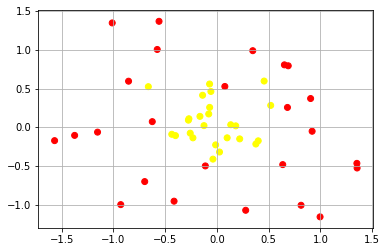

In [2]:
points, color = sklearn.datasets.make_circles(n_samples=50, 
                                              shuffle=True, 
                                              noise=0.3, 
                                              random_state=1, 
                                              factor=0.01)
plt.scatter(np.array(points)[:,0], np.array(points)[:,1], c=color, cmap='autumn')
plt.grid(True)

In [3]:
#sklearn.linear_model.LogisticRegression()
# создаем модель
log_reg = LogisticRegression()
# обучаем модель
log_reg.fit(points, color)
# делаем предсказание для двух новых точек (1,1) и (-1,-1)
res = log_reg.predict([[1,1], [-1,-1]])
print("Первая точка относится к классу {}, вторая - к классу {}".format(res[0], res[1]))
print(log_reg.intercept_, log_reg.coef_)

Первая точка относится к классу 1, вторая - к классу 0
[-0.005228] [[-0.03643091  0.16476996]]


Значения, которые находятся в полях log_reg.coef_ и log_reg.intercept_, являются коэффициентами уравнения разделяющей прямой $Ax+By+C=0$. Если в уравнении прямой в явном виде выразить $y$, то оно примет вид $y(x) = \frac{-Ax-C}{B} = 
-\frac{A}{B}x-\frac{C}{B}$.

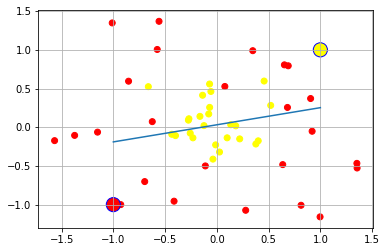

In [4]:
A, B = log_reg.coef_[0]; C = log_reg.intercept_
plt.scatter(np.array(points)[:,0], np.array(points)[:,1], c=color, cmap='autumn')
plt.scatter([1,-1], [1,-1], s=200, c=res, edgecolors='b', cmap='autumn')
plt.plot([-1, 1], [(-A*(-1)-C)/B, (-A*1-C)/B])
plt.grid(True)
plt.show()

Качество распознавания будет низким, поскольку исходное множество точек не является линейно разделимым. Для правильного решения задачи необходимо преобразовывать данные.

#### Задача регрессии - предсказать значение величины

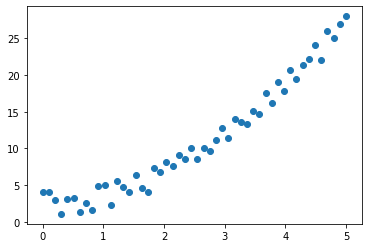

In [5]:
xs = np.linspace(0, 5, 50)
ys = np.array([i**2 + np.random.randint(1,5) for i in xs])
plt.scatter(xs, ys)

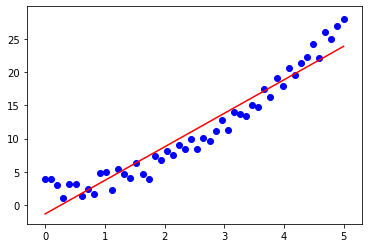

In [6]:
#sklearn.linear_model.LinearRegression()
# Создаем модель линейной регрессии
linreg1 = LinearRegression()
# Обучаем модель. Необходимо использовать метод ndarray.reshape(-1,1) для преобразования вектора-строки в вектор-столбец
linreg1.fit(xs.reshape(-1,1), ys)
# Делаем предсказание
result = linreg1.predict(xs.reshape(-1,1))
plt.plot(xs, result, c='r')
plt.scatter(xs, ys, c='b')
plt.show()

Входными данными для модели были значения xs, а целевыми признаками - значения ys. То есть модель описывается линейным уравнением прямой $y(x)=Ax+B$ и внутренними параметрами (весами) модели являются коэффициенты $A$ и $B$. С помощью линейной регрессии эти коэффициенты $A$ и $B$ оптимизируются таким образом, чтобы прямая проходила как можно ближе к заданным точкам.

#### Добавление нового признака в задаче регрессии

В рассмотренной только что задаче увеличим количество признаков, добавим в качестве признака значения квадратов xs.

In [7]:
X = np.c_[xs, xs**2]

Теперь модель имеет вид $y(x) = Ax^2+Bx+C$ и необходимо подобрать оптимальные значения весов $A$, $B$ и $C$.

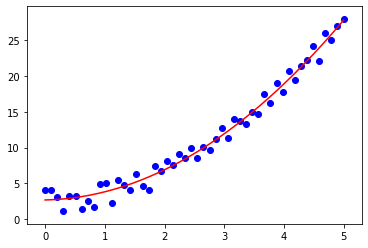

In [8]:
linreg2 = LinearRegression()
linreg2.fit(X, ys)
result = linreg2.predict(X)
plt.plot(xs, result, c='r')
plt.scatter(xs, ys, c='b')
plt.show()

Видно, что квадратичная функция лучше приближает заданный набор точек, т.е. добавление признака улучшило работу модели.

В предыдущих примерах качество работы модели оценивалось визуально, однако на практике всегда используются точные инструменты оценки качества моделей, называемые метриками.

<a href='#toc'>Назад к Оглавлению</a>

# Метрики качества <a name='metrics'></a>

## Задачи классификации <a name='classification-metrics'></a>

<table>
    <tr>
    <td></td><td>Истина</td><td>Ложь</td>
    </tr>
    <tr>
    <td>Предсказано "Истина"</td><td>Истинноположительно, true positive (TP)</td><td>Ложноположительно, false positive (FP)</td>
    </tr>
    <tr>
    <td>Предсказано "Ложь"</td><td>Ложноотрицательно, false negative (FN)</td><td>Истинноотрицательно, true negative (TN)</td>
    </tr>
</table>

Accuracy

$$
Accuracy = \frac{tp+tn}{tp+fp+fn+tn}
$$

Precision

$$
Precision = \frac{tp}{tp+fp}
$$


Recall

$$
Recall = \frac{tp}{tp+fn}
$$

$$
F_\beta = (1+\beta^2) \frac{p r}{\beta ^2 p + r},~F_1 = \frac{2pr}{p+r}
$$


In [9]:
from sklearn.datasets import load_digits
digits = load_digits()

In [10]:
digits.data.shape, digits.target.shape

((1797, 64), (1797,))

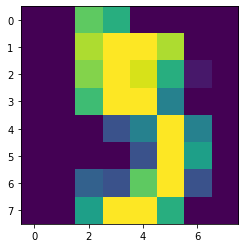

In [11]:
plt.imshow(digits.data[5].reshape(8,8))

In [12]:
model = LogisticRegression()
X_train, X_check, y_train, y_check = train_test_split(digits.data, digits.target, test_size=0.3)
model.fit(X_train, y_train)
model.predict(X_check[15:16])

array([0])

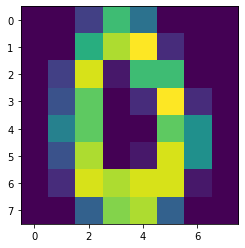

In [13]:
plt.imshow(X_check[15].reshape(8,8))

In [14]:
accuracy_score(y_check, model.predict(X_check))

0.9537037037037037

In [15]:
cross_val_score(model, digits.data, digits.target, scoring='accuracy', cv=5, n_jobs=-1, verbose=0)

array([0.92307692, 0.88121547, 0.94986072, 0.95798319, 0.89295775])

In [16]:
print(classification_report(y_check, model.predict(X_check)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       0.89      0.96      0.92        50
           2       0.98      1.00      0.99        58
           3       0.94      0.94      0.94        54
           4       0.98      0.96      0.97        49
           5       0.94      0.88      0.91        56
           6       0.98      0.98      0.98        58
           7       0.98      0.98      0.98        50
           8       0.89      0.96      0.92        56
           9       0.95      0.85      0.90        47

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540



#### ROC-AUC, PR-кривая (оси: точность, полнота) 

ROC-кривая (англ. receiver operating characteristic, рабочая характеристика приёмника) — график, позволяющий оценить качество бинарной классификации, отображает соотношение между долей объектов от общего количества носителей признака, верно классифицированных как несущие признак (англ. true positive rate, TPR, называемой чувствительностью алгоритма классификации), и долей объектов от общего количества объектов, не несущих признака, ошибочно классифицированных как несущие признак (англ. false positive rate, FPR, величина 1-FPR называется специфичностью алгоритма классификации) при варьировании порога решающего правила.

## Метрики для задачи регрессии <a name='regression_metrics'></a>

Манхэтенская метрика
$$
\rho(x,y) = \sum_{i=1}^{n}{|x_i-y_i|}
$$

Евклидова метрика
$$
\rho (x,y) = \sqrt{\sum_{i=1}^{n}{(x_i-y_i)^2}}
$$

Метрика Минковского (обобщение евклидовой и манхэттенской метрик)
$$
\rho(x,y) = \left( \sum_{i=1}^{n}{|x_i - y_i|^p} \right)^\frac{1}{p}
$$

Косинусное расстояние
$$
\rho(x,y)=\cos(\alpha) = \frac{x \cdot y }{|x||y|} = 
\frac{\sum_{i=1}^{n}{x_i y_i}}{\sum_{i=1}^{n}{x_i^2} \sum_{i=1}^{n}{y_i^2}}
$$

#### Mean Square Error (MSE)

$l$ - размер выборки, $y_i$ - истинная метка, $\hat{y_i}$ - результат работы алгоритма.

Сумма квадратов отклонений найденных значений от целевых.

$$
L = \frac{1}{2}\sum_{i=1}^{n}{\left(y_i - \hat{y_i}\right)^2}
$$

#### logloss

$l$ - размер выборки, $y_i$ - истинная метка, $\hat{y_i}$ - результат работы алгоритма.

$$
L = \frac{1}{l}\sum_{i=1}^{l}{\left( y_i \log{\hat{y_i}} - (1-y_i)\log{(1-\hat{y_i})} \right)}
$$

# Пример переобучения <a name='overfitting'></a>

Задача регрессии полиномами степени 0-9, увеличение дисперсии

In [17]:
def f(xs, noise):
    m = [x**4+(np.random.random()*2-1)*noise for x in xs]
    return np.array(m)

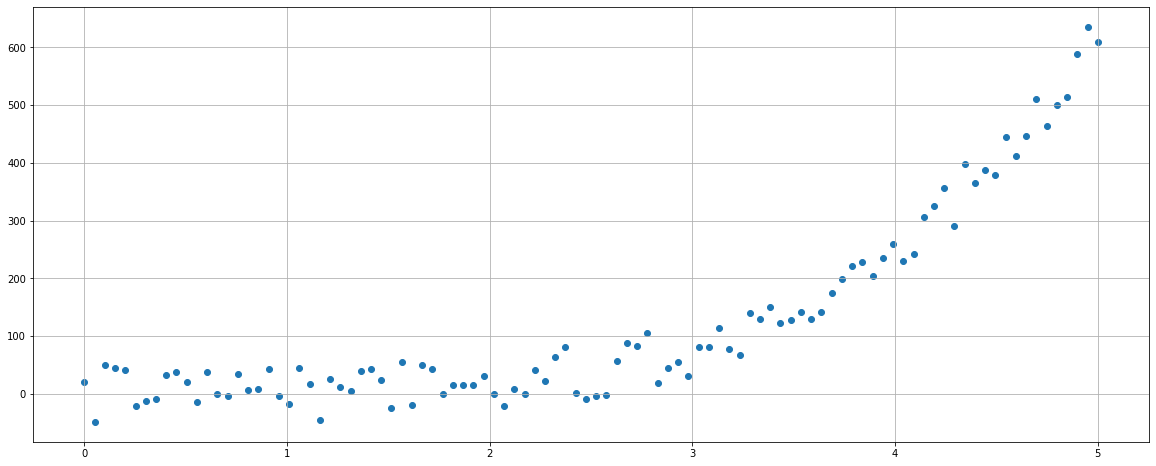

In [18]:
xs = np.linspace(0, 5, 100)
ys = f(xs, 50)
plt.figure(figsize=(20,8))
plt.scatter(xs, ys)
plt.grid(True)
plt.show()

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [20]:
def model(X, y, degree):
    pipeline = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    pipeline.fit(X.reshape(-1,1), y)
    return pipeline.predict(X.reshape(-1,1))

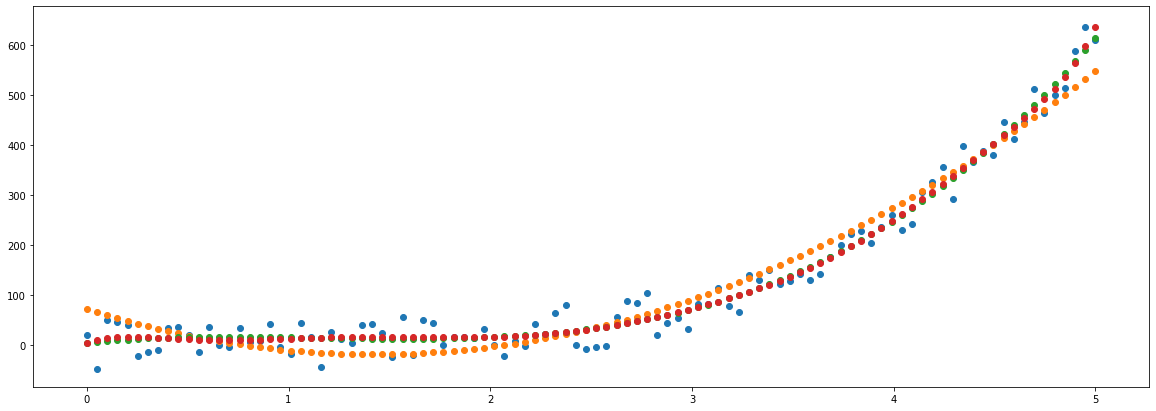

In [21]:
ys_2 = model(xs, ys, 2)
ys_3 = model(xs, ys, 3)
ys_10 = model(xs, ys, 10)
plt.figure(figsize=(20,7))
plt.scatter(xs, ys)
plt.scatter(xs, ys_2)
plt.scatter(xs, ys_3)
plt.scatter(xs, ys_10)

<a href='#toc'>Назад к Оглавлению</a>

# Примеры реализации моделей машинного обучения <a name='models'></a>

## Генерация массива данных <a name='data'></a>

In [22]:
points, colors = sklearn.datasets.make_circles(n_samples=50, 
                                              shuffle=True, 
                                              noise=0.35, 
                                              random_state=1, 
                                              factor=0.2)

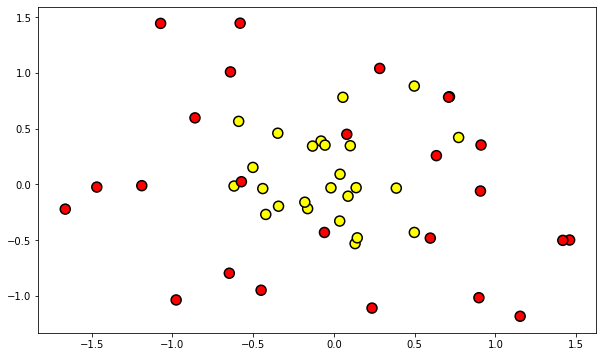

In [23]:
plt.figure(figsize=(10,6))
xs = np.array(points)[:, 0]
ys = np.array(points)[:, 1]
plt.scatter(xs, ys, c=colors, s=100, cmap='autumn', edgecolors='black', linewidth=1.5);
plt.show()

<a href='#toc'>Назад к Оглавлению</a>

## K ближайших соседей <a name='knn'></a>

sklearn.metrics.accuracy.score=0.8235294117647058
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.73      1.00      0.84         8

    accuracy                           0.82        17
   macro avg       0.86      0.83      0.82        17
weighted avg       0.87      0.82      0.82        17



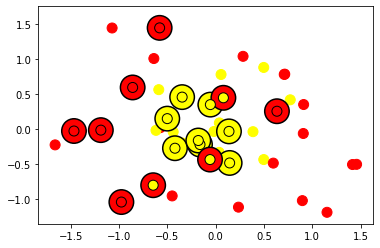

In [24]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_check, y_train, y_check = train_test_split(points, colors, test_size=0.33, random_state=1)
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
knn_result = knn.predict(X_check)

print("sklearn.metrics.accuracy.score={}".format(accuracy_score(y_check, knn_result)))
print(classification_report(y_check, knn_result))

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=100, cmap='autumn');
plt.scatter(X_check[:,0], X_check[:,1], c=y_check, s=600, cmap='autumn', edgecolors='black', linewidth=1.5);
plt.scatter(X_check[:,0], X_check[:,1], c=knn_result, s=100, cmap='autumn', edgecolors='black');

<a href='#toc'>Назад к Оглавлению</a>

## Дерево принятия решений <a name='tree'></a>

sklearn.metrics.accuracy.score=0.5882352941176471
              precision    recall  f1-score   support

           0       0.58      0.78      0.67         9
           1       0.60      0.38      0.46         8

    accuracy                           0.59        17
   macro avg       0.59      0.58      0.56        17
weighted avg       0.59      0.59      0.57        17



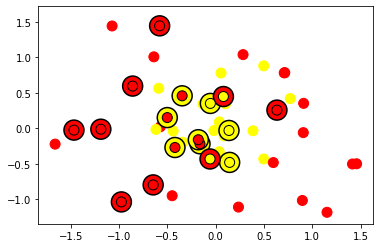

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X_train, X_check, y_train, y_check = train_test_split(points, colors, test_size=0.33, random_state=1)

tree = DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features=2, min_samples_leaf=10, random_state=1)
tree.fit(X_train, y_train)
tree_result = tree.predict(X_check)
print("sklearn.metrics.accuracy.score={}".format(accuracy_score(y_check, tree_result)))
report = classification_report(y_check, tree_result)
print(report)

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=100, cmap='autumn');
plt.scatter(X_check[:,0], X_check[:,1], c=y_check, s=400, cmap='autumn', edgecolors='black', linewidth=1.5);
plt.scatter(X_check[:,0], X_check[:,1], c=tree_result, s=100, cmap='autumn', edgecolors='black');

sklearn.metrics.accuracy.score=0.5882352941176471
              precision    recall  f1-score   support

           0       0.58      0.78      0.67         9
           1       0.60      0.38      0.46         8

    accuracy                           0.59        17
   macro avg       0.59      0.58      0.56        17
weighted avg       0.59      0.59      0.57        17



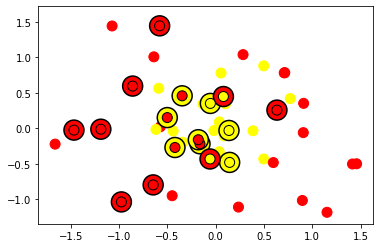

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X_train, X_check, y_train, y_check = train_test_split(points, colors, test_size=0.33, random_state=1)

tree = DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features=2, min_samples_leaf=10, random_state=1)
tree.fit(X_train, y_train)
tree_result = tree.predict(X_check)
print("sklearn.metrics.accuracy.score={}".format(accuracy_score(y_check, tree_result)))
report = classification_report(y_check, tree_result)
print(report)

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=100, cmap='autumn');
plt.scatter(X_check[:,0], X_check[:,1], c=y_check, s=400, cmap='autumn', edgecolors='black', linewidth=1.5);
plt.scatter(X_check[:,0], X_check[:,1], c=tree_result, s=100, cmap='autumn', edgecolors='black');

In [27]:
tree_params = {'max_depth': range(1,11), 'max_features': range(1,3)}
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)
tree_grid.fit(X_train, y_train)
print(tree_grid.best_params_)
print(tree_grid.best_score_)
accuracy_score(y_check, tree_grid.predict(X_check))

#export_graphviz(tree, feature_names=['x1', 'x2'], out_file='tree_picture', filled=True)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'max_depth': 1, 'max_features': 2}
0.6666666666666666


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


0.5294117647058824

<a href='#toc'>Назад к Оглавлению</a>

## Логистическая регрессия <a name='logreg'></a>

sklearn.metrics.accuracy.score=0.47058823529411764
logreg_clf.score=0.47058823529411764
              precision    recall  f1-score   support

           0       0.50      0.11      0.18         9
           1       0.47      0.88      0.61         8

    accuracy                           0.47        17
   macro avg       0.48      0.49      0.40        17
weighted avg       0.48      0.47      0.38        17



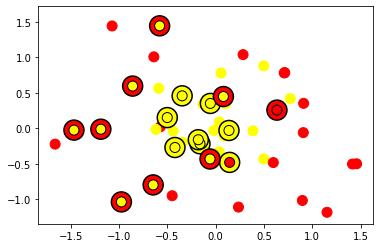

In [28]:
X_train, X_check, y_train, y_check = train_test_split(points, colors, test_size=0.33, random_state=1)

logreg_clf = LogisticRegression(solver='lbfgs')
logreg_clf.fit(X_train, y_train)
logit_result = logreg_clf.predict(X_check)

print("sklearn.metrics.accuracy.score={}".format(accuracy_score(y_check, logit_result)))
print("logreg_clf.score={}".format(logreg_clf.score(X_check, y_check)))
report = classification_report(y_check, logit_result)
print(report)

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=100, cmap='autumn');
plt.scatter(X_check[:,0], X_check[:,1], c=y_check, s=400, cmap='autumn', edgecolors='black', linewidth=1.5);
plt.scatter(X_check[:,0], X_check[:,1], c=logit_result, s=100, cmap='autumn', edgecolors='black');
  
plt.show()

<a href='#toc'>Назад к Оглавлению</a>

## Градиентный бустинг <a name='gb'></a>

sklearn.metrics.accuracy.score=0.8235294117647058
gbc.score=0.8235294117647058
              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.78      0.88      0.82         8

    accuracy                           0.82        17
   macro avg       0.83      0.83      0.82        17
weighted avg       0.83      0.82      0.82        17



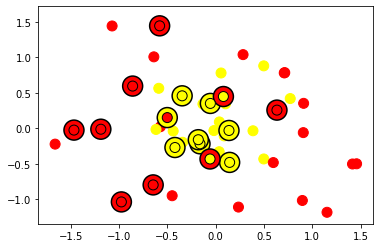

In [29]:
#from sklearn.ensemble import GradientBoostingClassifier

X_train, X_check, y_train, y_check = train_test_split(points, colors, test_size=0.33, random_state=1)

gbc = GradientBoostingClassifier(n_estimators=20, max_depth=20, max_features=2)
gbc.fit(X_train, y_train)
gbc_result = gbc.predict(X_check)
print("sklearn.metrics.accuracy.score={}".format(accuracy_score(y_check, gbc_result)))
print("gbc.score={}".format(gbc.score(X_check, y_check)))
report = classification_report(y_check, gbc_result)
print(report)

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=100, cmap='autumn');
plt.scatter(X_check[:,0], X_check[:,1], c=y_check, s=400, cmap='autumn', edgecolors='black', linewidth=1.5);
plt.scatter(X_check[:,0], X_check[:,1], c=gbc_result, s=100, cmap='autumn', edgecolors='black');
  
plt.show()

<a href='#toc'>Назад к Оглавлению</a>

# Ссылки <a name='links'></a>

- kaggle.com
- https://www.kaggle.com/yurychernyshov/simple-titanic-solution/edit
- https://scikit-learn.org/

<a href='#toc'>Назад к Оглавлению</a>

#### Случайный лес

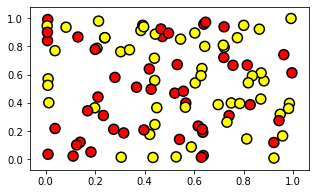

In [30]:
clf = RandomForestClassifier(n_estimators=5)
f = [[np.random.random(),np.random.random()] for _ in range(100)]
X = [i[0] for i in f]
Y = [i[1] for i in f]
l = [np.random.choice([True, False]) for _ in range(100)]
plt.rcParams['figure.figsize'] = (5,3)
plt.scatter(X, Y, c=l, s=100, cmap='autumn', edgecolors='black', linewidth=1.5);

In [31]:
clf = clf.fit(f,l)

In [32]:
r = clf.predict([[3,4],[0,-1]])
print(r)

[ True  True]


In [33]:
print(clf.score(f,l))

0.92


In [34]:
result = cross_validate(clf, f, l)  # defaults to 5-fold CV
result['test_score']  # r_squared score is high because dataset is easy
print(clf.score(f,l))

NameError: name 'cross_validate' is not defined

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
steps = [('scaler', StandardScaler()), ('SVM', SVC())]
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps) # define the pipeline object.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(f,l,test_size=0.2, random_state=30, stratify=l)

In [ ]:
parameteres = {'SVM__C':[0.001,0.1,10,100,10e5], 'SVM__gamma':[0.1,0.01]}

In [ ]:
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5)

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
print("score = {}".format(grid.score(X_test,y_test)))
print(grid.best_params_)

In [ ]:
from sklearn.impute import KNNImputer
X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(X)